In [1]:
#===========================IMPORT LIBRARIES===========================#

import matplotlib.pyplot as plt # for plotting
import numpy as np # for numerical operations
import pandas as pd # for data manipulation in dataframes
import matplotlib.colors as colors

import sklearn.metrics as metrics 

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes # for zoomed in plots
from mpl_toolkits.axes_grid1.inset_locator import mark_inset # for zoomed in plots

#===============SET PARAMETERS FOR CUSTOM PLOTTING====================#

# Set the inside ticks to be default
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True

# Set font size of x and y labels to be 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Set custom color cycle
custom_colors = [    
    '#0081C8',  # Olynmpic Blue
    '#EE334E',  # Olynmpic Red
    '#00A651',  # Olympic Green
    '#FCB131', # Olympic Yellow
    '#ba55d3',  # Medium Orchid
    '#00ced1',  # Dark Turquoise
    '#a89078', #Pastel brown
    '#e9967a',  # Dark Salmon
    '#66cdaa',   # Medium Aquamarine
    '#db7093'  # Pale Violet Red
]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_colors)

In [2]:
#===========================fUNCTIONS===========================#

def load_zenith_results(file_path):
    results = pd.read_csv(file_path)
    true_zenith = results['cos_zenith']
    predicted_zenith = results['cos_zenith_pred']
    #kappa = results['zenith_kappa']
    return true_zenith, predicted_zenith #, kappa

def plot_angle_dist(true_labels, predicted_labels, name, save_path):

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.hist(true_labels, bins=100, range=(0, np.pi), histtype='step', label='True Zenith')
    ax.hist(predicted_labels, bins=100, range=(0, np.pi), histtype='step', label='Predicted Zenith')
    ax.set_xlabel('Zenith Angle (rad)')
    ax.set_ylabel('Counts')
    ax.legend()
    ax.set_yscale('log')


    plt.savefig(save_path + name + '/' + name + '_cos_zenith_dist.png', dpi=300)
    plt.show()

def plot_zenith_residual(true_labels, predicted_labels, name, save_path):
    residual = predicted_labels - true_labels

    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.hist(residual, bins=100, range=(-3, 3), histtype='step')
    ax.set_xlabel('Zenith Residual (rad)')
    ax.set_ylabel('Counts')

    plt.savefig(save_path + name + '/' + name + '_cos_zenith_residual.png', dpi=300)
    plt.show()

def plot_2D_true_vs_pred(true_labels, predicted_labels, name, save_path):

    bins_zenith_color = np.linspace(-0.1, 3.2, 100)

    fig, ax = plt.subplots(figsize=(10, 6))
    hist = ax.hist2d(predicted_labels, true_labels, bins=bins_zenith_color, norm=colors.LogNorm())
    ax.set_xlabel('Predicted Zenith Angle (rad)')
    ax.set_ylabel('True Zenith Angle (rad)')
    
    # Add a colorbar
    cbar = fig.colorbar(hist[3], ax=ax)
    cbar.set_label('Counts')

    perf_line = np.linspace(0, 3.1, 100)
    ax.plot(perf_line, perf_line, 'r--', label='Perfect Prediction')

    plt.savefig(save_path + name + '/' + name + '_cos_zenith_2D.png', dpi=300)
    plt.show()

## Validation results

In [3]:
validation_result_zenith = '/groups/icecube/luc/Workspace/GraphNet/work/LE_cos_zenith_reconstruction/Weighted_logcosh_loss/Results_CSVs/results_validation.csv'

true_cos_zenith, predicted_cos_zenith = load_zenith_results(validation_result_zenith)
true_zenith = np.arccos(true_cos_zenith)
predicted_zenith = np.arccos(predicted_cos_zenith)

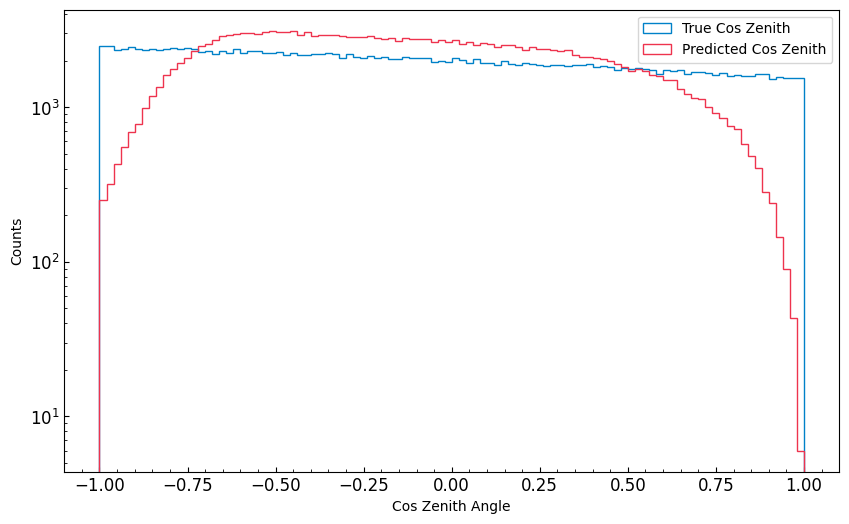

In [4]:
# Plot the distributions of true and predicted cos(zenith) values
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(true_cos_zenith, bins=100, range=(-1, 1), histtype='step', label='True Cos Zenith')
ax.hist(predicted_cos_zenith, bins=100, range=(-1, 1), histtype='step', label='Predicted Cos Zenith')
ax.set_xlabel('Cos Zenith Angle')
ax.set_ylabel('Counts')
ax.legend()
ax.set_yscale('log')

plt.show()

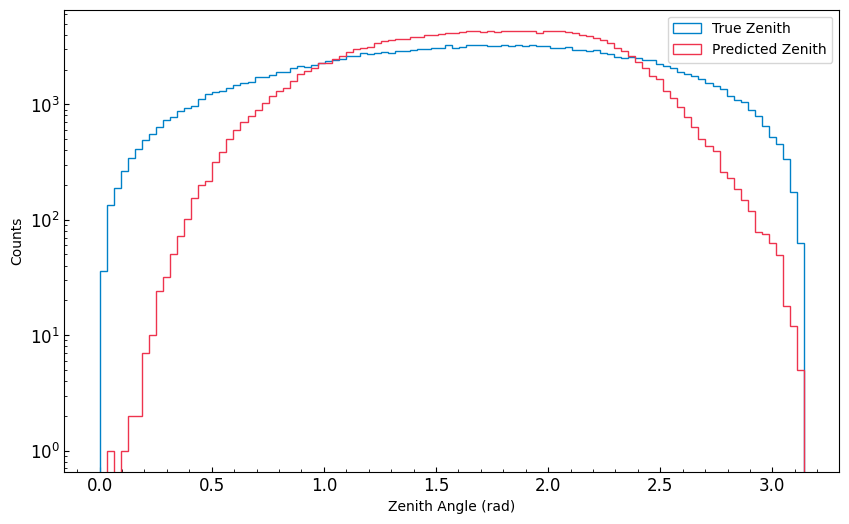

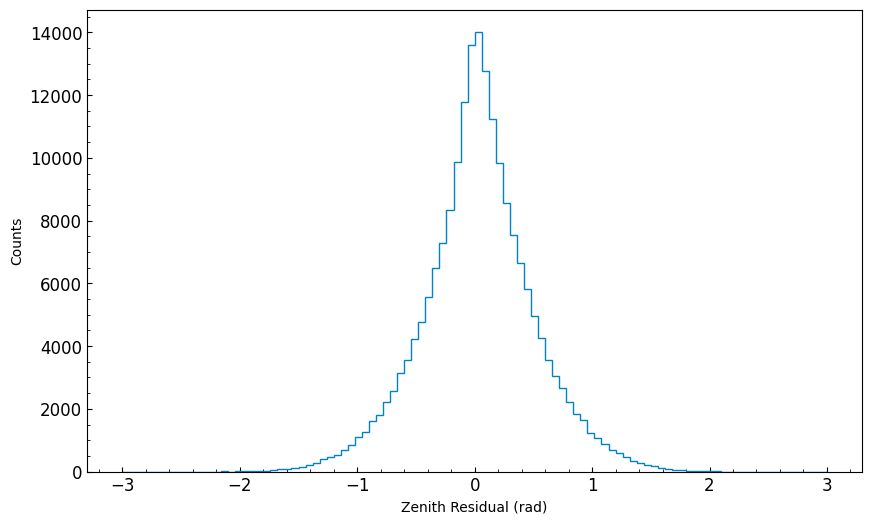

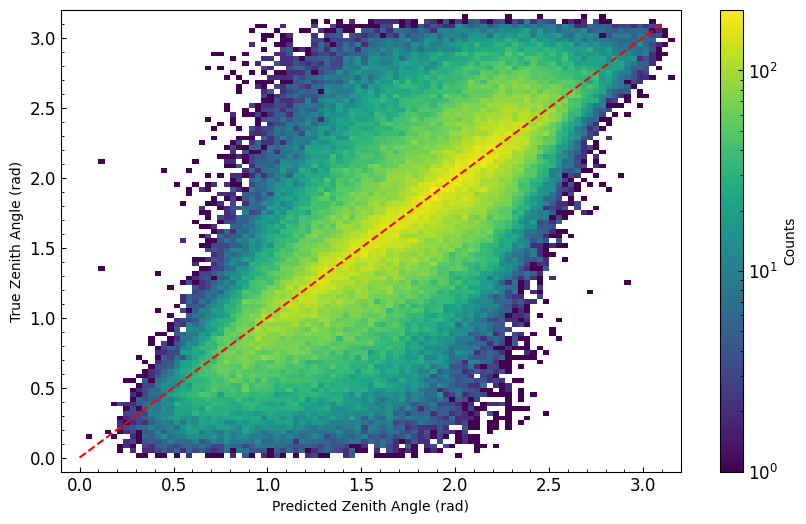

In [5]:
# Plot with kappa_mask = False
plot_angle_dist(true_zenith, predicted_zenith, 'Validation', '/groups/icecube/luc/Workspace/GraphNet/work/LE_cos_zenith_reconstruction/Logcosh_loss/Plots/')
plot_zenith_residual(true_zenith, predicted_zenith, 'Validation', '/groups/icecube/luc/Workspace/GraphNet/work/LE_cos_zenith_reconstruction/Logcosh_loss/Plots/')
plot_2D_true_vs_pred(true_zenith, predicted_zenith, 'Validation', '/groups/icecube/luc/Workspace/GraphNet/work/LE_cos_zenith_reconstruction/Logcosh_loss/Plots/')

In [6]:
# Calculate the mean residual
residual = predicted_zenith - true_zenith
mean_residual = np.mean(residual)
print('Mean Residual:', mean_residual)

# Calculate the standard deviation of the residual
std_residual = np.std(residual)
print('Standard Deviation of Residual:', std_residual)

Mean Residual: 0.03194251840697221
Standard Deviation of Residual: 0.4756077588487768
